<h1 style="font-size:300%; background-color:white; color:red; text-align:center; line-height : 60px;">
Carga de imagenes sin procesar </h1>

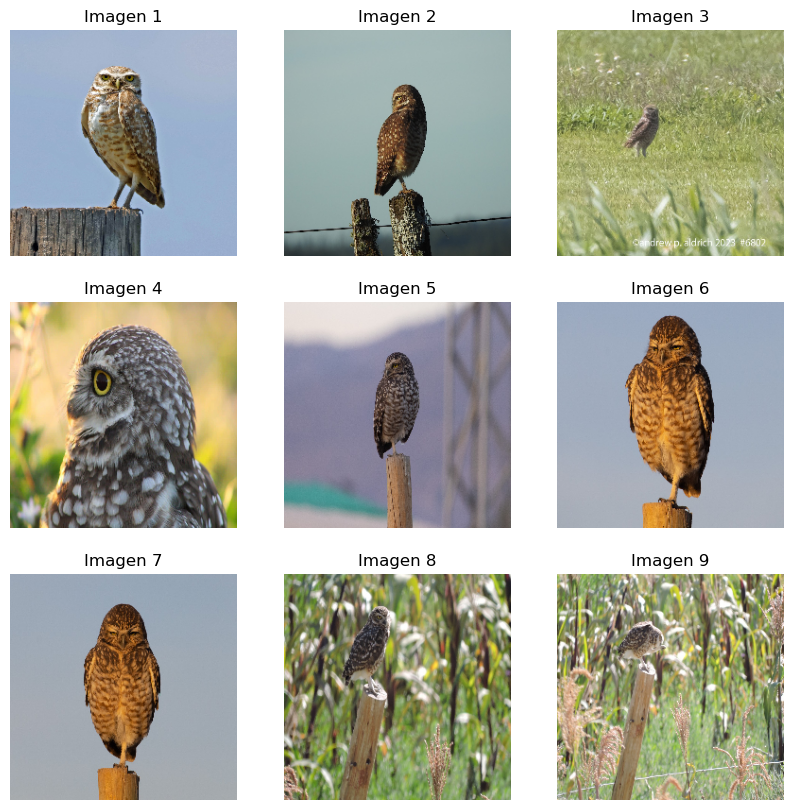

In [1]:
import cv2
import os #os.listdir para guardar una carpeta
import numpy as np
import matplotlib.pyplot as plt #Graficar

def imprimir(lista,n_filas,n_columnas):
    fig, axs = plt.subplots(n_filas, n_columnas, figsize=(10, 10))    
    
    for i in range(n_columnas*n_filas):
        fila = i // n_columnas
        columna = i % n_columnas
        axs[fila, columna].imshow(lista[i], cmap='gray')
        axs[fila, columna].axis('off')
        axs[fila, columna].set_title(f'Imagen {i+1}')

def cargarImagenes(ruta, archivo):
    ruta_imagen = os.path.join(ruta, archivo) #Asigna la dirección de imagen por imagen
    imagen = cv2.imread(ruta_imagen) #Lee la imagen
    
    # Verificar si la imagen se leyó correctamente
    if imagen is not None:
        imagen_redimensionada = cv2.resize(imagen, tamaño) #Cambiar tamaño para facilitar el trabajo y el uso de Numpy
        imagen_rgb = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2RGB) #Cambiar BGR a RGB
        return imagen_rgb

# Tamaño de las imágenes redimensionadas
tamaño = (240, 240)

# Ruta a la carpeta de imágenes
ruta_carpeta1 = './Especies/1. Aruco (Anhima cornuta)'
ruta_carpeta2 = './Especies/2. Cacique candela (Hypopyrrhus pyrohypogaster)'
ruta_carpeta3 = './Especies/3. El murruco (Athene cunicularia)'
ruta_carpeta4 = './Especies/4. El corocoro rojo (Eudocimus ruber)'
ruta_carpeta5 = './Especies/5. El jacamara coliverde (Galbula galbula)'
ruta_carpeta6 = './Especies/6. El perico cara sucia (Eupsittula pertinax)'
ruta_carpeta7 = './Especies/7. El pajaro pendulo (Momotus momota)'
ruta_carpeta8 = './Especies/8. La jacana comun (Jacana jacana)'
ruta_carpeta9 = './Especies/9. El tucan pechiblanco (Ramphastos tucanus)'
ruta_carpeta10 = './Especies/10. La tangara azulada (Thraupis episcopus)'
ruta_carpeta11 = './Especies/11. Imagenes no clases'

# Obtener una lista de los archivos en la carpeta
archivos1 = os.listdir(ruta_carpeta1)
archivos2 = os.listdir(ruta_carpeta2)
archivos3 = os.listdir(ruta_carpeta3)
archivos4 = os.listdir(ruta_carpeta4)
archivos5 = os.listdir(ruta_carpeta5)
archivos6 = os.listdir(ruta_carpeta6)
archivos7 = os.listdir(ruta_carpeta7)
archivos8 = os.listdir(ruta_carpeta8)
archivos9 = os.listdir(ruta_carpeta9)
archivos10 = os.listdir(ruta_carpeta10)
archivos11 = os.listdir(ruta_carpeta11)

# Inicializar una lista vacía para las imágenes
imagenes1 = []
imagenes2 = []
imagenes3 = []

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos1:
    imagen = cargarImagenes(ruta_carpeta1, archivo)
    imagenes1.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes1 = np.array(imagenes1)
imagenes1 = []

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos2:
    imagen = cargarImagenes(ruta_carpeta2, archivo)
    imagenes2.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes2 = np.array(imagenes2)
imagenes3 = []

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos3:
    imagen = cargarImagenes(ruta_carpeta3, archivo)
    imagenes3.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes3 = np.array(imagenes3)
imagenes3 = []

imprimir(arreglo_imagenes3,3,3)  

<h1 style="font-size:300%; background-color:white; color:red; text-align:center; line-height : 60px;">
Preprocesamiento </h1>

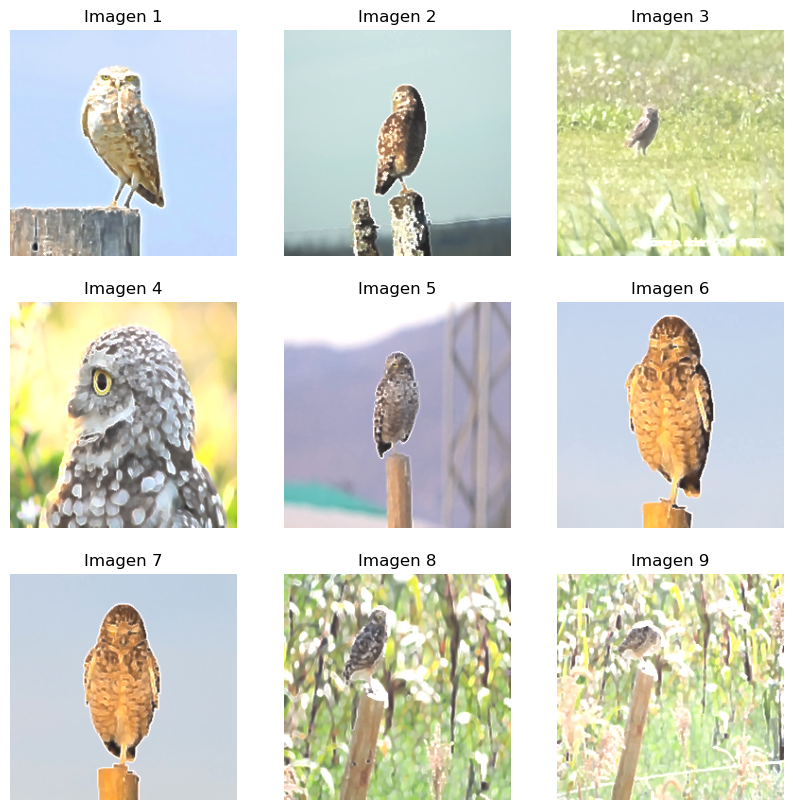

In [2]:
def filtro(imagen):
    imagen_procesamiento = cv2.bilateralFilter(imagen, 5, 75, 75)
    imagen_procesamiento = cv2.GaussianBlur(imagen_procesamiento, (3, 3), 0.2)
    
    return imagen_procesamiento
           

def realce(imagen):
    # Parámetros del filtro de realce de contraste
    alpha = 1.1  # factor de ganancia
    beta = 0.1  # desplazamiento
    
    # Convertir la imagen a tipo float32
    imagen = imagen.astype(np.float32) / 255.0

    # Aplicar el filtro de realce de contraste
    imagen_procesada = np.clip(alpha * imagen + beta, 0, 1)

    # Convertir la imagen de vuelta a tipo uint8
    imagen_procesada = (imagen_procesada * 255).astype(np.uint8)

    # Agregar la imagen procesada a la lista
    return imagen_procesada

def eliminar_fondo_color(imagen,x1,x2,y1,y2,z1,z2):
    # Convertir la imagen de BGR a HSV
    hsv = cv2.cvtColor(imagen, cv2.COLOR_RGB2HSV)
    
    # Definir el rango de color del fondo en HSV
    rango_bajo = np.array([x1, y1, z1])  # Bajo límite de color del fondo en HSV
    rango_alto = np.array([x2, y2, z2])  # Alto límite de color del fondo en HSV
    
    # Crear una máscara para el fondo basada en el rango de color
    mascara = cv2.inRange(hsv, rango_bajo, rango_alto)
    
    # Aplicar la máscara al canal alfa de la imagen (si existe) o al canal V de HSV
    if imagen.shape[2] == 4:  # La imagen tiene un canal alfa (RGBA)
        imagen[:, :, 3] = cv2.bitwise_and(imagen[:, :, 3], mascara)
    else:  # La imagen no tiene un canal alfa, se aplica a V de HSV
        hsv[:, :, 2] = cv2.bitwise_and(hsv[:, :, 2], mascara)
        imagen = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    
    return imagen

def eliminar_tonalidad(imagen, x1, x2, y1, y2, z1, z2):
    # Convertir la imagen a espacio de color HSV
    imagen_hsv = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)

    # Definir los rangos de tonalidad verde en HSV
    rango_bajo = np.array([x1, y1, z1])
    rango_alto = np.array([x2, y2, z2])

    # Aplicar umbralización para detectar los píxeles en el rango de tonalidad verde
    mascara = cv2.inRange(imagen_hsv, rango_bajo, rango_alto)

    # Aplicar operación de bitwise-and para eliminar los píxeles verdes de la imagen original
    imagen_sin_tonalidad = cv2.bitwise_and(imagen, imagen, mask=~mascara)

    return imagen_sin_tonalidad

# Función para eliminar el fondo de una imagen a color utilizando segmentación por contornos
def eliminar_fondo_contornos(imagen):
    # Convertir la imagen de BGR a escala de grises
    gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
    
    # Aplicar umbralización adaptativa para obtener una máscara de los contornos del objeto
    _, mascara = cv2.threshold(gris, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    # Aplicar la máscara a la imagen para eliminar el fondo
    imagen_procesada = cv2.bitwise_and(imagen, imagen, mask=mascara)
    
    return imagen_procesada

def normalize_brightness_contrast(image, alpha, beta):
    # Convertir la imagen de BGR a LAB
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Separar el canal de luminosidad (L)
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Aplicar la normalización de brillo y contraste en el canal de luminosidad
    normalized_l_channel = np.clip(alpha * l_channel + beta, 0, 255).astype(np.uint8)

    # Combinar el canal de luminosidad normalizado con los canales de color originales
    normalized_lab_image = cv2.merge((normalized_l_channel, a_channel, b_channel))

    # Convertir la imagen de LAB a BGR
    normalized_bgr_image = cv2.cvtColor(normalized_lab_image, cv2.COLOR_LAB2BGR)

    return normalized_bgr_image

def ecualizacion(imagen):
    # separar en canales RGB
    b, g, r = cv2.split(imagen)
    
    # aplicar ecualización de histograma en cada canal
    b_eq = cv2.equalizeHist(b)
    g_eq = cv2.equalizeHist(g)
    r_eq = cv2.equalizeHist(r)
    
    # unir canales ecualizados
    imagen_eq = cv2.merge((b_eq, g_eq, r_eq))
    
    # agregar imagen ecualizada a la lista
    return imagen_eq

def top_black(imagen):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Aplicar el operador Top Hat
    tophat = cv2.morphologyEx(imagen, cv2.MORPH_TOPHAT, kernel)

    # Aplicar el operador Black Hat
    blackhat = cv2.morphologyEx(imagen, cv2.MORPH_BLACKHAT, kernel)

    imagen_segmentada = cv2.add(imagen,blackhat,tophat)
    
    # Agregar las imágenes procesadas a la lista
    return imagen_segmentada

def gradiente(imagen):
    
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))    
    # Convertir la imagen a escala de grises
    imagen_gris = cv2.cvtColor(imagen, cv2.COLOR_RGB2GRAY)
    
    # Aplicar la dilatación y la erosión a la imagen
    imagen_gradiente = cv2.morphologyEx(imagen_gris, cv2.MORPH_GRADIENT, kernel)
    
    # Convertir la imagen de vuelta a color
    imagen_gradiente_color = cv2.cvtColor(imagen_gradiente, cv2.COLOR_GRAY2RGB)
    
    imagen_mejorada = cv2.add(imagen,imagen_gradiente_color)
    
    # Agregar la imagen con el gradiente morfológico al arreglo
    return(imagen_mejorada)  

def segmentacionBinaria(imagen):
    umbral = 130

    # Obtener las dimensiones de la imagen
    alto, ancho, _ = imagen.shape

    # Crear una máscara con los mismos canales que la imagen original
    mascara = np.zeros((alto, ancho, imagen.shape[2]), dtype=np.uint8)

    # Encontrar los píxeles que son mayores al umbral y asignarles valor 255 (blanco)
    indices = np.where(imagen > umbral)
    mascara[indices] = 255

    # Invertir la máscara
    mascara_invertida = cv2.bitwise_not(mascara)

    # Crear una imagen en blanco
    imagen_segmentada = np.ones_like(imagen) * 255

    # Copiar los píxeles de la imagen original donde la máscara inversa sea mayor al umbral
    imagen_segmentada[np.where(mascara_invertida > umbral)] = 0

    # Devolver la imagen segmentada
    return imagen_segmentada
    
# Eliminar el fondo de cada imagen en el arreglo imagenes utilizando segmentación por color y contornos
imagenes_procesadas1 = []
imagenes_procesadas2 = []
imagenes_procesadas3 = []

for imagen in arreglo_imagenes1:
    imagen_procesada = filtro(imagen)
    imagen_procesada = realce(imagen_procesada)
    imagen_procesada = top_black(imagen_procesada)
    imagen_procesada = gradiente(imagen_procesada)

    imagenes_procesadas1.append(imagen_procesada)
    
for imagen in arreglo_imagenes2:
    imagen_procesada = filtro(imagen)
    imagen_procesada = realce(imagen_procesada)
    imagen_procesada = top_black(imagen_procesada)
    imagen_procesada = gradiente(imagen_procesada)
    
    imagenes_procesadas2.append(imagen_procesada)  
    
for imagen in arreglo_imagenes3:    
    imagen_procesada = filtro(imagen)
    imagen_procesada = realce(imagen_procesada)
    imagen_procesada = top_black(imagen_procesada)
    imagen_procesada = gradiente(imagen_procesada)
    
    imagenes_procesadas3.append(imagen_procesada)      

    
    
# Mostrar las imágenes segmentadas
imprimir(imagenes_procesadas3, 3, 3)

<h1 style="font-size:300%; background-color:white; color:red; text-align:center; line-height : 60px;">
Carga de imagenes preprocesadas </h1>

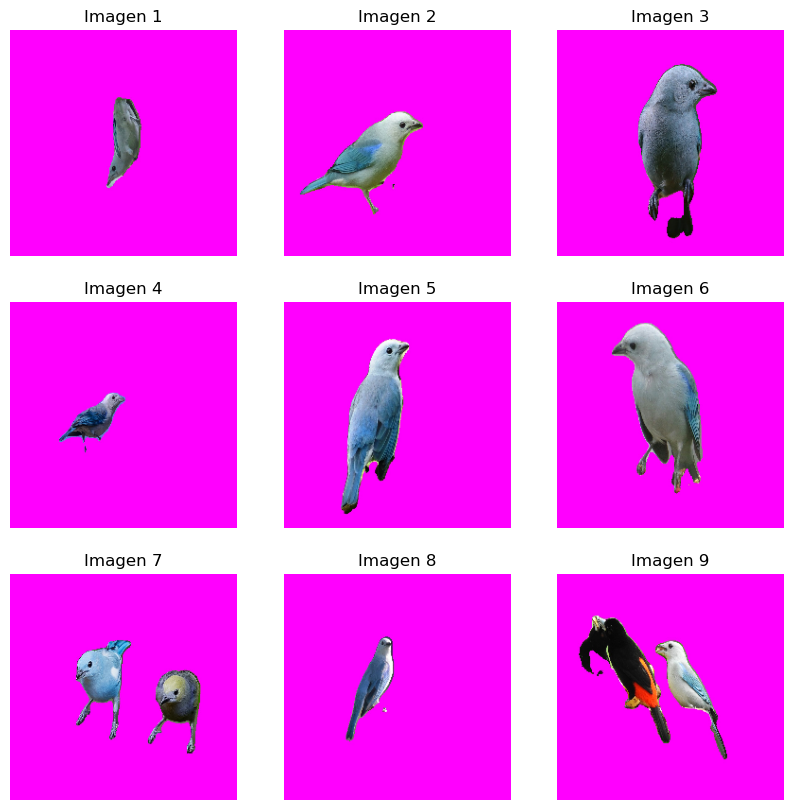

In [10]:
import cv2
import os #os.listdir para guardar una carpeta
import numpy as np
import matplotlib.pyplot as plt #Graficar
from scipy import ndimage  # Robert Cruzado

def imprimir(lista,n_filas,n_columnas):
    fig, axs = plt.subplots(n_filas, n_columnas, figsize=(10, 10))    
    
    for i in range(n_columnas*n_filas):
        fila = i // n_columnas
        columna = i % n_columnas
        axs[fila, columna].imshow(lista[i], cmap='gray')
        axs[fila, columna].axis('off')
        axs[fila, columna].set_title(f'Imagen {i+1}')

def cargarImagenes(ruta, archivo):
    ruta_imagen = os.path.join(ruta, archivo) #Asigna la dirección de imagen por imagen
    imagen = cv2.imread(ruta_imagen) #Lee la imagen
    
    # Verificar si la imagen se leyó correctamente
    if imagen is not None:
        imagen_redimensionada = cv2.resize(imagen, tamaño) #Cambiar tamaño para facilitar el trabajo y el uso de Numpy
        imagen_rgb = cv2.cvtColor(imagen_redimensionada, cv2.COLOR_BGR2RGB) #Cambiar BGR a RGB
        return imagen_rgb

# Tamaño de las imágenes redimensionadas
tamaño = (240, 240)

# Ruta a la carpeta de imágenes
ruta_carpeta1 = './imagenes modificadas/1. Aruco (Anhima cornuta)'
ruta_carpeta2 = './imagenes modificadas/2. Cacique candela (Hypopyrrhus pyrohypogaster)'
ruta_carpeta3 = './imagenes modificadas/3. El murruco (Athene cunicularia)'
ruta_carpeta4 = './imagenes modificadas/4. El corocoro rojo (Eudocimus ruber)'
ruta_carpeta5 = './imagenes modificadas/5. El jacamara coliverde (Galbula galbula)'
ruta_carpeta6 = './imagenes modificadas/6. El perico cara sucia (Eupsittula pertinax)'
ruta_carpeta7 = './imagenes modificadas/7. El pajaro pendulo (Momotus momota)'
ruta_carpeta8 = './imagenes modificadas/8. La jacana comun (Jacana jacana)'
ruta_carpeta9 = './imagenes modificadas/9. El tucan pechiblanco (Ramphastos tucanus)'
ruta_carpeta10 = './imagenes modificadas/10. La tangara azulada (Thraupis episcopus)'
ruta_carpeta11 = './Especies/11. Imagenes no clases'

# Obtener una lista de los archivos en la carpeta
archivos1 = os.listdir(ruta_carpeta1)
archivos2 = os.listdir(ruta_carpeta2)
archivos3 = os.listdir(ruta_carpeta3)
archivos4 = os.listdir(ruta_carpeta4)
archivos5 = os.listdir(ruta_carpeta5)
archivos6 = os.listdir(ruta_carpeta6)
archivos7 = os.listdir(ruta_carpeta7)
archivos8 = os.listdir(ruta_carpeta8)
archivos9 = os.listdir(ruta_carpeta9)
archivos10 = os.listdir(ruta_carpeta10)
archivos11 = os.listdir(ruta_carpeta11)

# Inicializar una lista vacía para las imágenes
imagenes1 = []
imagenes2 = []
imagenes3 = []
imagenes4 = []
imagenes5 = []
imagenes6 = []
imagenes7 = []
imagenes8 = []
imagenes9 = []
imagenes10 = []

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos1:
    imagen = cargarImagenes(ruta_carpeta1, archivo)
    imagenes1.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes1 = np.array(imagenes1, dtype=np.uint16)
del imagenes1

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos2:
    imagen = cargarImagenes(ruta_carpeta2, archivo)
    imagenes2.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes2 = np.array(imagenes2, dtype=np.uint16)
del imagenes2

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos3:
    imagen = cargarImagenes(ruta_carpeta3, archivo)
    imagenes3.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes3 = np.array(imagenes3, dtype=np.uint16)
del imagenes3

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos4:
    imagen = cargarImagenes(ruta_carpeta4, archivo)
    imagenes4.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes4 = np.array(imagenes4, dtype=np.uint16)
del imagenes4

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos5:
    imagen = cargarImagenes(ruta_carpeta5, archivo)
    imagenes5.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes5 = np.array(imagenes5, dtype=np.uint16)
del imagenes5

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos6:
    imagen = cargarImagenes(ruta_carpeta6, archivo)
    imagenes6.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes6 = np.array(imagenes6, dtype=np.uint16)
del imagenes6

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos7:
    imagen = cargarImagenes(ruta_carpeta7, archivo)
    imagenes7.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes7 = np.array(imagenes7, dtype=np.uint16)
del imagenes7

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos8:
    imagen = cargarImagenes(ruta_carpeta8, archivo)
    imagenes8.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes8 = np.array(imagenes8, dtype=np.uint16)
del imagenes8

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos9:
    imagen = cargarImagenes(ruta_carpeta9, archivo)
    imagenes9.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes9 = np.array(imagenes9, dtype=np.uint16)
del imagenes9

# Leer cada imagen y agregarla a la lista de imágenes
for archivo in archivos10:
    imagen = cargarImagenes(ruta_carpeta10, archivo)
    imagenes10.append(imagen)
    
# Convertir la lista de imágenes en un arreglo de NumPy
arreglo_imagenes10 = np.array(imagenes10, dtype=np.uint16)
del imagenes10


imprimir(arreglo_imagenes10,3,3)

<h1 style="font-size:300%; background-color:white; color:red; text-align:center; line-height : 60px;">
Clasificador SKlearn </h1>

<h1 style="font-size:300%; background-color:white; color:black; text-align:center; line-height : 30px;">
Carga de imagenes y modelo </h1>

In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier   #Tipo de clasificador
from sklearn.model_selection import train_test_split  #Entrenador
from sklearn.metrics import accuracy_score            #Porcentajes
import pickle

# Datos de las imágenes
imagenes1 = np.array(arreglo_imagenes1)
del arreglo_imagenes1
imagenes2 = np.array(arreglo_imagenes2)
del arreglo_imagenes2
imagenes3 = np.array(arreglo_imagenes3)
del arreglo_imagenes3
imagenes4 = np.array(arreglo_imagenes4)
del arreglo_imagenes4
imagenes5 = np.array(arreglo_imagenes5)
del arreglo_imagenes5
imagenes6 = np.array(arreglo_imagenes6)
del arreglo_imagenes6
imagenes7 = np.array(arreglo_imagenes7)
del arreglo_imagenes7
imagenes8 = np.array(arreglo_imagenes8)
del arreglo_imagenes8
imagenes9 = np.array(arreglo_imagenes9)
del arreglo_imagenes9
imagenes10 = np.array(arreglo_imagenes10)
del arreglo_imagenes10

# Obtener las dimensiones de las imágenes
num_imagenes1, altura1, ancho1, _ = imagenes1.shape
num_imagenes2, altura2, ancho2, _ = imagenes2.shape
num_imagenes3, altura3, ancho3, _ = imagenes3.shape
num_imagenes4, altura4, ancho4, _ = imagenes4.shape
num_imagenes5, altura5, ancho5, _ = imagenes5.shape
num_imagenes6, altura6, ancho6, _ = imagenes6.shape
num_imagenes7, altura7, ancho7, _ = imagenes7.shape
num_imagenes8, altura8, ancho8, _ = imagenes8.shape
num_imagenes9, altura9, ancho9, _ = imagenes9.shape
num_imagenes10, altura10, ancho10, _ = imagenes10.shape

# Reshape de las matrices de imágenes y normalización, debe hacerse por estar las imagenes en RGB
X1 = imagenes1.reshape(num_imagenes1, altura1 * ancho1 * 3)
del num_imagenes1, altura1, ancho1
del imagenes1

X2 = imagenes2.reshape(num_imagenes2, altura2 * ancho2 * 3)
del num_imagenes2, altura2, ancho2
del imagenes2

X3 = imagenes3.reshape(num_imagenes3, altura3 * ancho3 * 3)
del num_imagenes3, altura3, ancho3
del imagenes3

X4 = imagenes4.reshape(num_imagenes4, altura4 * ancho4 * 3)
del num_imagenes4, altura4, ancho4
del imagenes4

X5 = imagenes5.reshape(num_imagenes5, altura5 * ancho5 * 3)
del num_imagenes5, altura5, ancho5
del imagenes5

X6 = imagenes6.reshape(num_imagenes6, altura6 * ancho6 * 3)
del num_imagenes6, altura6, ancho6
del imagenes6

X7 = imagenes7.reshape(num_imagenes7, altura7 * ancho7 * 3)
del num_imagenes7, altura7, ancho7
del imagenes7

X8 = imagenes8.reshape(num_imagenes8, altura8 * ancho8 * 3)
del num_imagenes8, altura8, ancho8
del imagenes8

X9 = imagenes9.reshape(num_imagenes9, altura9 * ancho9 * 3)
del num_imagenes9, altura9, ancho9
del imagenes9

X10 = imagenes10.reshape(num_imagenes10, altura10 * ancho10 * 3)
del num_imagenes10, altura10, ancho10
del imagenes10

# Combina los arreglos de imágenes en uno solo
X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10), axis=0)

# Crea el vector de etiquetas correspondiente a cada imagen
y = np.concatenate((np.zeros(len(X1), dtype=np.uint8), np.ones(len(X2), dtype=np.uint8), 
                    np.ones(len(X3), dtype=np.uint8) * 2, np.ones(len(X4), dtype=np.uint8) * 3, 
                    np.ones(len(X5), dtype=np.uint8) * 4, np.ones(len(X6), dtype=np.uint8) * 5, 
                    np.ones(len(X7), dtype=np.uint8) * 6, np.ones(len(X8), dtype=np.uint8) * 7, 
                    np.ones(len(X9), dtype=np.uint8) * 8, np.ones(len(X10), dtype=np.uint8) * 9))

del X1
del X2
del X3
del X4
del X5
del X6
del X7
del X8
del X9
del X10

# Asigna nombres a las etiquetas
nombres_etiquetas = {
    0: "Aruco",
    1: "Cacique",
    2: "Murruco",
    3: "Corocoro",
    4: "Jacamara",
    5: "Perico",
    6: "Pendulo",
    7: "Jacana",
    8: "Tucan",
    9: "Tangara",
}    

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

del X
del y

# Crear el clasificador Random Forest
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # ajustar según necesidad

# Entrenar el clasificador Random Forest
random_forest_classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = random_forest_classifier.predict(X_test)

# Calcular la precisión del clasificador
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador Random Forest: {:.2f}".format(accuracy))

with open("clasificador RF.pkl", "wb") as file:
    pickle.dump(random_forest_classifier, file)

Precisión del clasificador Random Forest: 0.50


<h1 style="font-size:300%; background-color:white; color:black; text-align:center; line-height : 30px;">
Comprobacion del modelo </h1>

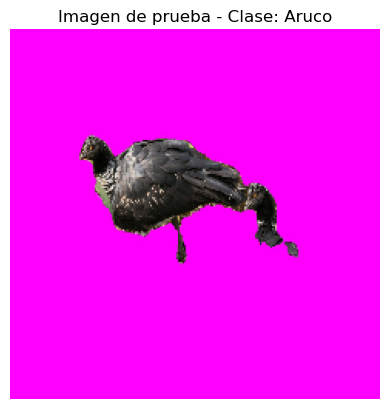

Probabilidad de ser Aruco: 0.09
Probabilidad de ser Cacique: 0.13
Probabilidad de ser Murruco: 0.04
Probabilidad de ser Corocoro: 0.06
Probabilidad de ser Jacamara: 0.01
Probabilidad de ser Perico: 0.07
Probabilidad de ser Pendulo: 0.07
Probabilidad de ser Jacana: 0.31
Probabilidad de ser Tucan: 0.17
Probabilidad de ser Tangara: 0.05
Clase predicha: Jacana


In [6]:
# Obtener una imagen de prueba
indice_imagen = 70  # Índice de la imagen de prueba que deseas visualizar
imagen_prueba = X_test[indice_imagen].reshape(240, 240, 3)
etiqueta_verdadera = y_test[indice_imagen]

# Obtener las probabilidades de clasificación de la imagen de prueba
probabilidades = random_forest_classifier.predict_proba([X_test[indice_imagen]])
clases = random_forest_classifier.classes_

# Obtener la clase predicha
clase_predicha = random_forest_classifier.predict([X_test[indice_imagen]])

# Mostrar la imagen de prueba
plt.imshow(imagen_prueba)
plt.axis('off')
plt.title("Imagen de prueba - Clase: {}".format(nombres_etiquetas[etiqueta_verdadera]))
plt.show()

# Mostrar las probabilidades y la clase predicha
for i in range(len(probabilidades[0])):
    print("Probabilidad de ser {}: {:.2f}".format(nombres_etiquetas[clases[i]], probabilidades[0][i]))

print("Clase predicha: {}".format(nombres_etiquetas[clase_predicha[0]]))

<h1 style="font-size:300%; background-color:white; color:black; text-align:center; line-height : 30px;">
Carga del modelo guardado </h1>

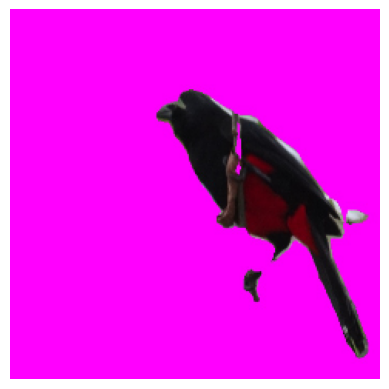

Probabilidad de Aruco: 0.02
Probabilidad de Cacique: 0.40
Probabilidad de Murruco: 0.00
Probabilidad de Corocoro: 0.01
Probabilidad de Jacamara: 0.03
Probabilidad de Perico: 0.05
Probabilidad de Pendulo: 0.09
Probabilidad de Jacana: 0.29
Probabilidad de Tucan: 0.10
Probabilidad de Tangara: 0.01
Etiqueta predicha: Cacique


In [11]:
import pickle
import matplotlib.pyplot as plt

nombres_etiquetas = {
    0: "Aruco",
    1: "Cacique",
    2: "Murruco",
    3: "Corocoro",
    4: "Jacamara",
    5: "Perico",
    6: "Pendulo",
    7: "Jacana",
    8: "Tucan",
    9: "Tangara",
}    

# Cargar el clasificador desde el archivo
with open("clasificador RF.pkl", "rb") as file:
    loaded_classifier = pickle.load(file)

# Obtener la imagen de prueba (imagen 0 de arreglo_imagenes1)
imagen_prueba_jpg = arreglo_imagenes2[1]

# Preprocesar la imagen de prueba
imagen_prueba = imagen_prueba_jpg.reshape(1, 240 * 240 * 3)

# Realizar la predicción utilizando el clasificador cargado
probabilidades = loaded_classifier.predict_proba(imagen_prueba)

# Obtener la etiqueta predicha
prediccion = loaded_classifier.predict(imagen_prueba)
etiqueta_predicha = nombres_etiquetas[prediccion[0]]

# Mostrar la imagen de prueba
plt.imshow(imagen_prueba_jpg)
plt.axis('off')
plt.show()

# Mostrar las probabilidades de cada clase
for clase, probabilidad in zip(loaded_classifier.classes_, probabilidades[0]):
    print("Probabilidad de {}: {:.2f}".format(nombres_etiquetas[clase], probabilidad))
    
# Imprimir la etiqueta predicha
print("Etiqueta predicha: {}".format(etiqueta_predicha))

<h1 style="font-size:300%; background-color:white; color:red; text-align:center; line-height : 60px;">
Clasificador CNN </h1>

<h1 style="font-size:300%; background-color:white; color:black; text-align:center; line-height : 30px;">
Carga de imagenes para el clasificador </h1>

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Configurar el uso de la GPU
physical_devices = tf.config.experimental.list_physical_devices("GPU")
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

imagenes1 = np.array(arreglo_imagenes1)
del arreglo_imagenes1
imagenes2 = np.array(arreglo_imagenes2)
del arreglo_imagenes2
imagenes3 = np.array(arreglo_imagenes3)
del arreglo_imagenes3
imagenes4 = np.array(arreglo_imagenes4)
del arreglo_imagenes4
imagenes5 = np.array(arreglo_imagenes5)
del arreglo_imagenes5
imagenes6 = np.array(arreglo_imagenes6)
del arreglo_imagenes6
imagenes7 = np.array(arreglo_imagenes7)
del arreglo_imagenes7
imagenes8 = np.array(arreglo_imagenes8)
del arreglo_imagenes8
imagenes9 = np.array(arreglo_imagenes9)
del arreglo_imagenes9
imagenes10 = np.array(arreglo_imagenes10)
del arreglo_imagenes10

# Obtener las dimensiones de las imágenes
num_imagenes1, altura1, ancho1, _ = imagenes1.shape
num_imagenes2, altura2, ancho2, _ = imagenes2.shape
num_imagenes3, altura3, ancho3, _ = imagenes3.shape
num_imagenes4, altura4, ancho4, _ = imagenes4.shape
num_imagenes5, altura5, ancho5, _ = imagenes5.shape
num_imagenes6, altura6, ancho6, _ = imagenes6.shape
num_imagenes7, altura7, ancho7, _ = imagenes7.shape
num_imagenes8, altura8, ancho8, _ = imagenes8.shape
num_imagenes9, altura9, ancho9, _ = imagenes9.shape
num_imagenes10, altura10, ancho10, _ = imagenes10.shape

# Reshape de las matrices de imágenes
X1 = imagenes1.reshape(num_imagenes1, altura1, ancho1, 3) / 255.0
del num_imagenes1, altura1, ancho1
del imagenes1

X2 = imagenes2.reshape(num_imagenes2, altura2, ancho2, 3) / 255.0
del num_imagenes2, altura2, ancho2
del imagenes2

X3 = imagenes3.reshape(num_imagenes3, altura3, ancho3, 3) / 255.0
del num_imagenes3, altura3, ancho3
del imagenes3

X4 = imagenes4.reshape(num_imagenes4, altura4, ancho4, 3) / 255.0
del num_imagenes4, altura4, ancho4
del imagenes4

X5 = imagenes5.reshape(num_imagenes5, altura5, ancho5, 3) / 255.0
del num_imagenes5, altura5, ancho5
del imagenes5

X6 = imagenes6.reshape(num_imagenes6, altura6, ancho6, 3) / 255.0
del num_imagenes6, altura6, ancho6
del imagenes6

X7 = imagenes7.reshape(num_imagenes7, altura7, ancho7, 3) / 255.0
del num_imagenes7, altura7, ancho7
del imagenes7

X8 = imagenes8.reshape(num_imagenes8, altura8, ancho8, 3) / 255.0
del num_imagenes8, altura8, ancho8
del imagenes8

X9 = imagenes9.reshape(num_imagenes9, altura9, ancho9, 3) / 255.0
del num_imagenes9, altura9, ancho9
del imagenes9

X10 = imagenes10.reshape(num_imagenes10, altura10, ancho10, 3) / 255.0
del num_imagenes10, altura10, ancho10
del imagenes10


# Combina los arreglos de imágenes en uno solo
X = np.concatenate((X1, X2, X3, X4, X5, X6, X7, X8, X9, X10), axis=0)

# Crea el vector de etiquetas correspondiente a cada imagen
y = np.concatenate((np.zeros(len(X1), dtype=np.uint8), np.ones(len(X2), dtype=np.uint8), 
                    np.ones(len(X3), dtype=np.uint8) * 2, np.ones(len(X4), dtype=np.uint8) * 3, 
                    np.ones(len(X5), dtype=np.uint8) * 4, np.ones(len(X6), dtype=np.uint8) * 5, 
                    np.ones(len(X7), dtype=np.uint8) * 6, np.ones(len(X8), dtype=np.uint8) * 7, 
                    np.ones(len(X9), dtype=np.uint8) * 8, np.ones(len(X10), dtype=np.uint8) * 9))

del X1
del X2
del X3
del X4
del X5
del X6
del X7
del X8
del X9
del X10

# Asigna nombres a las etiquetas
nombres_etiquetas = {
    0: "Aruco",
    1: "Cacique",
    2: "Murruco",
    3: "Corocoro",
    4: "Jacamara",
    5: "Perico",
    6: "Pendulo",
    7: "Jacana",
    8: "Tucan",
    9: "Tangara",
}    

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

del X
del y

<h1 style="font-size:300%; background-color:white; color:black; text-align:center; line-height : 30px;">
Creacion del clasificador </h1>

In [3]:
# Construir la arquitectura de la CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(240, 240, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dropout(0.3),  # Agregar capa de Dropout    
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=7, batch_size=16)

# Evaluar el modelo en el conjunto de prueba
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Precisión del clasificador CNN: {:.2f}".format(test_accuracy))

# Guardar el modelo en un archivo
model.save("Clasificador aves cnn.h5")

Epoch 1/7
428/428 [==============================] - 70s 161ms/step - loss: 1.7340 - accuracy: 0.3814
Epoch 2/7
428/428 [==============================] - 75s 176ms/step - loss: 1.1040 - accuracy: 0.6275
Epoch 3/7
428/428 [==============================] - 74s 172ms/step - loss: 0.8360 - accuracy: 0.7228
Epoch 4/7
428/428 [==============================] - 74s 173ms/step - loss: 0.5762 - accuracy: 0.8089
Epoch 5/7
428/428 [==============================] - 69s 160ms/step - loss: 0.4267 - accuracy: 0.8661
Epoch 6/7
428/428 [==============================] - 67s 156ms/step - loss: 0.3496 - accuracy: 0.8853
Epoch 7/7
428/428 [==============================] - 79s 184ms/step - loss: 0.2735 - accuracy: 0.9125
Precisión del clasificador CNN: 0.85


<h1 style="font-size:300%; background-color:white; color:black; text-align:center; line-height : 30px;">
Comprobacion del modelo obtenido </h1>

1/1 [==============================] - 0s 19ms/step


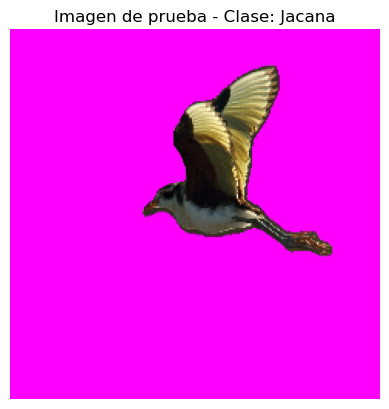

Probabilidad de ser Aruco: 0.04
Probabilidad de ser Cacique: 0.00
Probabilidad de ser Murruco: 0.01
Probabilidad de ser Corocoro: 0.01
Probabilidad de ser Jacamara: 0.00
Probabilidad de ser Perico: 0.06
Probabilidad de ser Pendulo: 0.07
Probabilidad de ser Jacana: 0.65
Probabilidad de ser Tucan: 0.14
Probabilidad de ser Tangara: 0.01
Clase predicha para la primera muestra de prueba: Jacana


In [8]:
# Obtener la primera imagen de prueba
indice_imagen = 100
imagen_muestra = X_test[indice_imagen].reshape(240, 240, 3)
etiqueta_verdadera = y_test[indice_imagen]

clases = {
    0: "Aruco",
    1: "Cacique",
    2: "Murruco",
    3: "Corocoro",
    4: "Jacamara",
    5: "Perico",
    6: "Pendulo",
    7: "Jacana",
    8: "Tucan",
    9: "Tangara",
}   

# Realizar predicciones de probabilidades en el conjunto de prueba
probabilidades_muestra = model.predict(np.expand_dims(imagen_muestra, axis=0))

probabilidades_muestra = probabilidades_muestra.round(6)

clase_predicha_muestra = np.argmax(probabilidades_muestra)

nombre_clase_predicha_muestra = nombres_etiquetas[clase_predicha_muestra]

# Establecer opciones de impresión para evitar la notación científica
np.set_printoptions(suppress=True)

# Mostrar la imagen
plt.imshow(imagen_muestra)
plt.axis('off')
plt.title("Imagen de prueba - Clase: {}".format(nombres_etiquetas[etiqueta_verdadera]))
plt.show()

# Mostrar las probabilidades y la clase predicha
for i in range(len(probabilidades_muestra[0])):
    print("Probabilidad de ser {}: {:.2f}".format(clases[i], probabilidades_muestra[0][i])) 
    
print("Clase predicha para la primera muestra de prueba:", nombre_clase_predicha_muestra)    

<h1 style="font-size:300%; background-color:white; color:black; text-align:center; line-height : 30px;">
Carga del clasificador guardado  </h1>

1/1 [==============================] - 0s 103ms/step


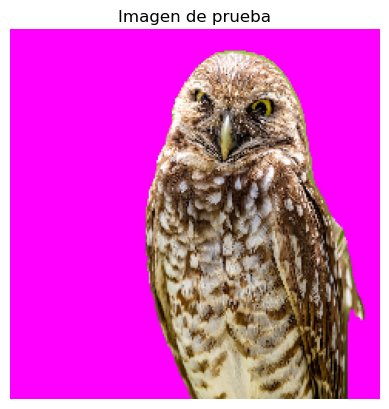

Probabilidad de ser Aruco: 0.00
Probabilidad de ser Cacique: 0.00
Probabilidad de ser Murruco: 1.00
Probabilidad de ser Corocoro: 0.00
Probabilidad de ser Jacamara: 0.00
Probabilidad de ser Perico: 0.00
Probabilidad de ser Pendulo: 0.00
Probabilidad de ser Jacana: 0.00
Probabilidad de ser Tucan: 0.00
Probabilidad de ser Tangara: 0.00
Clase predicha para la primera muestra de prueba: Murruco


In [18]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

clases = {
    0: "Aruco",
    1: "Cacique",
    2: "Murruco",
    3: "Corocoro",
    4: "Jacamara",
    5: "Perico",
    6: "Pendulo",
    7: "Jacana",
    8: "Tucan",
    9: "Tangara",
}   

# Cargar el modelo desde el archivo
loaded_model = load_model("Clasificador aves cnn 0.86.h5")

# Obtener la imagen de prueba (imagen 0 de arreglo_imagenes1)
imagen_prueba_jpg = arreglo_imagenes3[550]

# Redimensionar
imagen_prueba = imagen_prueba_jpg.reshape(1, 240, 240, 3) / 255.0

# Realizar predicciones de probabilidades en el conjunto de prueba
probabilidades_muestra = loaded_model.predict(imagen_prueba)

probabilidades_muestra = probabilidades_muestra.round(6)

clase_predicha_muestra = np.argmax(probabilidades_muestra)

nombre_clase_predicha_muestra = nombres_etiquetas[clase_predicha_muestra]

# Establecer opciones de impresión para evitar la notación científica
np.set_printoptions(suppress=True)

# Mostrar la imagen
plt.imshow(imagen_prueba_jpg)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Mostrar las probabilidades y la clase predicha
for i in range(len(probabilidades_muestra[0])):
    print("Probabilidad de ser {}: {:.2f}".format(clases[i], probabilidades_muestra[0][i])) 
    
print("Clase predicha para la primera muestra de prueba:", nombre_clase_predicha_muestra)    
